In [66]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    # your code here ****************************
    result = []
    for row in data:
        result.append(row[index])

    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)
    #  get sales ( index =3)
    sales_data = get_column ( data , 3)

    # building X input and y output for training
    X = [ tv_data , radio_data , newspaper_data ]
    y = sales_data
    return X , y

In [67]:
X , y = prepare_data('advertising.csv')
# list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
# print ( list )
# # Select one of the following answers :

In [68]:
def predict ( x1 , x2 , x3 , w1 , w2 , w3 , b ) :
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result

In [69]:
# y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
# print ( y )

In [70]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

In [71]:
l = compute_loss_mse ( y_hat =1 , y =0.5)
print ( l )

0.25


In [72]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y) 
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db
# g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
# print ( g_wi )
# g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
# print ( g_b )

In [73]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b
# after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
# print ( after_wi )
# after_b = update_weight_b ( b =0.5 , dl_db = -1.0 ,lr=1e-5)
# print ( after_b )

In [74]:
def initialize_params () :
    w1 , w2 , w3 , b = (0.016992259082509283,0.0070783670518262355,-0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

In [80]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mse(y, y_hat)

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            w1 = update_weight_wi ( w1 , dl_dw1 , lr )
            w2 = update_weight_wi ( w2 , dl_dw2 , lr )
            w3 = update_weight_wi ( w3 , dl_dw3 , lr )
            b = update_weight_b (b , dl_db , lr )

            # logging
            losses.append(loss)
            # print(loss)
    return (w1,w2,w3,b,losses)


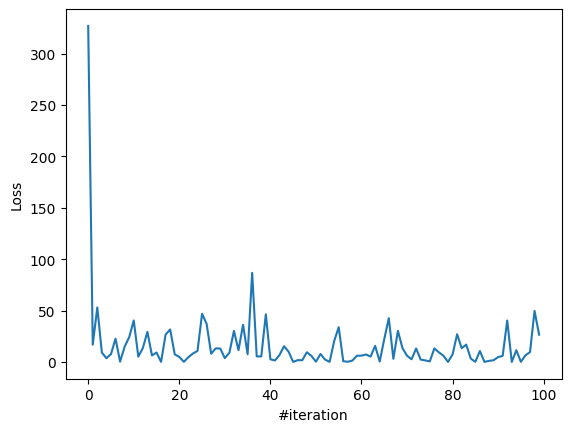

In [82]:
(w1,w2,w3,b,losses) = implement_linear_regression(X,y)
# implement_linear_regression(X,y)
plt.plot (losses[:100])
plt.xlabel ("#iteration")
plt.ylabel ("Loss")
plt.show ()

In [83]:
X , y = prepare_data ('advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
print ( w1 , w2 , w3 )

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [84]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ('advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression(X , y , epoch_max =50 , lr = 1e-5)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [87]:
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

In [88]:
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


In [102]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5, loss_function='mse'):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            if loss_function == 'mse':
                loss = compute_loss_mse(y, y_hat)
            elif loss_function == 'mae':
                loss = compute_loss_mae(y, y_hat)
            else:
                raise ValueError("Invalid loss function. Choose 'mse' or 'mae'.")

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            # accumulate gradient w1, w2, w3, b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (after processing N samples) - update parameters
        w1 -= lr * dw1_total/N
        w2 -= lr * dw2_total/N
        w3 -= lr * dw3_total/N
        b -= lr * db_total/N

        # logging
        losses.append(loss_total/N)

    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782949, 10.987623518830578, 10.877426442098113, 10.77030517743778, 10.666165788738784, 10.564917277518695, 10.466471490519933, 10.370743030217112, 10.277649168143096, 10.187109760945374, 10.099047169086274, 10.013386178104167, 9.930053922354574, 9.848979811153313, 9.770095457245784, 9.693334607529332, 9.618633075957472, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920476, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363875, 9.029340874825948, 8.97211310872959, 8.916357838686066, 8.86203115641928, 8.80

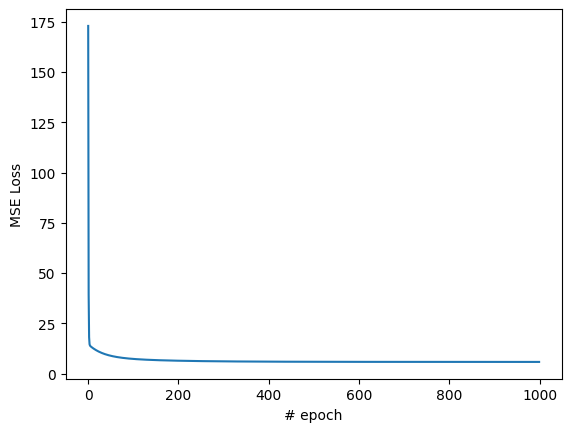

In [103]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y,
                                                               epoch_max=1000,
                                                               lr=1e-5,loss_function='mse')
print(losses)
plt.plot(losses)
plt.xlabel("# epoch")
plt.ylabel("MSE Loss")
plt.show()

In [104]:
X , y = prepare_data ('advertising.csv')
# using MSE loss
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y ,epoch_max =1000 ,lr =1e-5)

print ( w1 , w2 , w3 )

0.06710990754044266 0.15756173831487585 0.029619799386084403
